<br/>
<center>$Z= \vec{w} \cdot X + {b}$<center> <br/>

<img src="https://miro.medium.com/max/687/0*BcQ26EY75dXdztUF.png" align='center'>

<img src="https://miro.medium.com/max/2671/1*dx2AYvXVyPZ38TAiPeD9Aw.jpeg" align='center'>


Varios perceptrones apilados generan paredes ocultas, o bien, densas. 

En resumen, los bloques de una RNA son:

- Dense layer - a fully-connected layer, $f(X)=W \cdot X + \vec{b}$
- ReLU layer (or any other activation function to introduce non-linearity)
- Loss function - (crossentropy in case of multi-class classification problem)
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

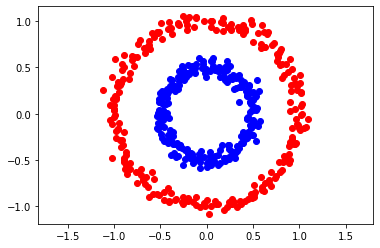

In [2]:
# CREAR EL DATASET

n = 500
p = 2

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="red")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="blue")
plt.axis("equal")
plt.show()


In [3]:
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    

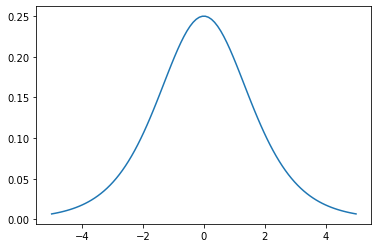

In [ ]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
       lambda x: (1 / (1 + np.e ** (-x))*(1-(1 / (1 + np.e ** (-x))))))

#sigm = (lambda x: 1 / (1 + np.e ** (-x)),
#        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

#relu = ((lambda x: np.max(0,x)), (lambda x: np.max(0,x)/x))
#_y = np.linspace(-1, 1, 100)

#plt.plot(_y, relu[0](_y))



In [ ]:
def create_nn(topology, act_f):
  
    nn = []
  
    for l, layer in enumerate(topology[:-1]):
    
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

In [ ]:
topology = [2, 8, 1]

neural_net = create_nn(topology, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
    out = [(None, X)]
  
    # Forward pass
    for l, layer in enumerate(neural_net):
  
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
  
        out.append((z, a))
    
  
    if train:
    
        # Backward pass 
        deltas = []
    
        for l in reversed(range(0, len(neural_net))):
      
            z = out[l+1][0]
            a = out[l+1][1]
            
#            _W = neural_net[l].W

            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            
            _W = neural_net[l].W


            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
        
    return out[-1][1]
  
  
  

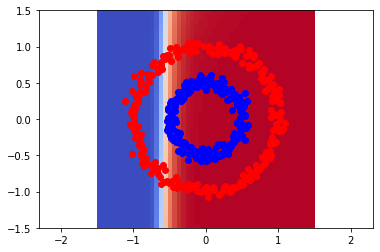

[[6.00170684e-01]
 [6.00340058e-01]
 [6.00170040e-01]
 [6.00105036e-01]
 [6.00372923e-01]
 [5.94146319e-01]
 [6.00162808e-01]
 [3.18109322e-06]
 [6.00365087e-01]
 [2.25134681e-01]
 [6.00246531e-01]
 [6.00160004e-01]
 [2.86379710e-07]
 [5.94714046e-01]
 [5.76718758e-01]
 [6.00385273e-01]
 [6.00314201e-01]
 [6.00342297e-01]
 [5.99936339e-01]
 [6.00187887e-01]
 [5.99531481e-01]
 [6.00259387e-01]
 [6.00283904e-01]
 [6.00345722e-01]
 [6.00313222e-01]
 [6.00368409e-01]
 [5.65887301e-01]
 [5.26803419e-01]
 [6.00337636e-01]
 [4.30816332e-01]
 [6.00335949e-01]
 [5.36955655e-01]
 [6.00156421e-01]
 [6.00358108e-01]
 [6.00168427e-01]
 [4.26442631e-08]
 [1.84278856e-06]
 [6.00111963e-01]
 [6.00226999e-01]
 [5.97966408e-01]
 [5.50663804e-04]
 [5.98160862e-01]
 [5.99824039e-01]
 [6.00288361e-01]
 [6.00306817e-01]
 [5.96050976e-01]
 [5.24854696e-01]
 [5.61251645e-01]
 [3.05640825e-07]
 [5.58682149e-01]
 [5.85826638e-01]
 [6.00137727e-01]
 [5.99852816e-01]
 [6.00136293e-01]
 [1.48351486e-02]
 [5.961915

In [ ]:
from IPython.display import clear_output
import time

neural_n = create_nn(topology, sigm)

loss = []

for i in range(5000):
    
  # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.5)
  
    if i % 100 == 0:
    
        print(pY)
  
        loss.append(l2_cost[0](pY, Y))
  
        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="red")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="blue")

        clear_output(wait=True)
        plt.show()
        #plt.plot(range(len(loss)), loss)
        #plt.show()
        time.sleep(0.5)  

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

plt.tick_params(labelbottom=False, labelleft=False)

In [ ]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

  clear_output(wait=True)
  plt.show()

## keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=1000)

# sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)